In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install textblob
!pip install wordcloud
!pip install nltk

In [25]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from wordcloud import WordCloud


In [26]:
df = pd.read_csv('../Project_amzn_rvw/data/Reviews.csv')

In [27]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [28]:
print(df.isnull().sum())
print(df.shape)

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64
(568454, 10)


In [29]:
#Now dropping null values and taking a random sample of size 10K.
df_sample = df[['Score', 'Text']].dropna().sample(10000, random_state=1).copy()

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
#defining a function to clean the sentences and get rid of punctuation or stopwords.
def clean_text(text):
    tokens = word_tokenize(text.lower()) 
    tokens = [word for word in tokens if word.isalpha()]  
    tokens = [word for word in tokens if word not in stopwords.words('english')]  
    return ' '.join(tokens)


In [36]:
nltk.download('punkt_tab')

df_sample['clean_text'] = df_sample['Text'].apply(clean_text)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


In [37]:
# We will add a 'polarity' column with a score ranging from -1 to 1 based on the positivity of the review.
df_sample['polarity'] = df_sample['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [38]:
def get_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'


In [39]:
df_sample['sentiment'] = df_sample['polarity'].apply(get_sentiment)

<Axes: xlabel='sentiment', ylabel='count'>

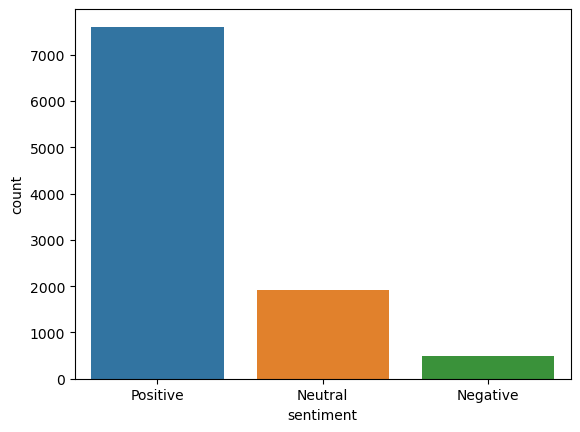

In [40]:
# Now we shall use Seaborn to visualize our results
sns.countplot(data=df_sample, x='sentiment')


We now plot a histogram using Seaborn, to visualize the distribution of review sentiment

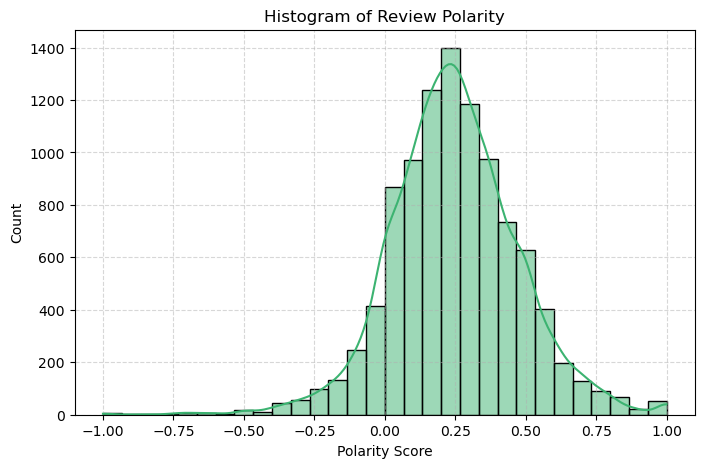

In [41]:
plt.figure(figsize=(8, 5))
sns.histplot(df_sample['polarity'], bins=30, kde=True, color='mediumseagreen')
plt.title('Histogram of Review Polarity')
plt.xlabel('Polarity Score')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Now we will make two Wordclouds, one for all positive reviews and one for all negative reviews.

In [46]:
plt.figure(figsize=(20, 10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

(-0.5, 1199.5, 599.5, -0.5)

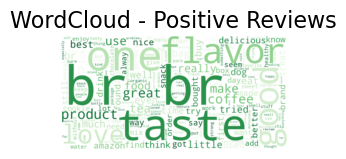

In [50]:
#This is the WordCloud for all positive reviews
positive_text = ' '.join(df_sample[df_sample['sentiment'] == 'Positive']['clean_text'])

wordcloud_pos = WordCloud(width=1200, height=600, background_color='white', colormap='Greens').generate(positive_text)

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('WordCloud - Positive Reviews', fontsize=16)
plt.axis('off')


(-0.5, 1199.5, 599.5, -0.5)

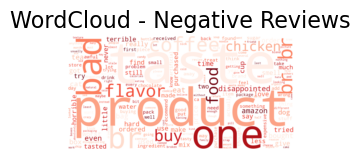

In [51]:
#This is the WordCloud for Negative Reviews
negative_text = ' '.join(df_sample[df_sample['sentiment'] == 'Negative']['clean_text'])

wordcloud_neg = WordCloud(width=1200, height=600, background_color='white', colormap='Reds').generate(negative_text)

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('WordCloud - Negative Reviews', fontsize=16)
plt.axis('off')

In [52]:
# Show both
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

We can infer from this that the reviews are distributed with a tilt towards the positive side. Thus our analysis is complete